# Ans

## 1
### (a). 
The fitted model will be

$$-17.2014*(Intercept)-0.0075*displacement+0.0316*horsepower-0.0069*weight+0.1022*acceleration+0.7586*year$$  

The taining error is  

In [19]:
Auto_train=read.csv("./Data/auto/auto_train.csv",header = T)
Auto_test=read.csv("./Data/auto/auto_test.csv",header = T)
m1=lm(mpg~.,data=Auto_train)
mean((Auto_train$mpg-m1$fitted.values)^2)

[1] 10.96261

The test error is

In [20]:
pred_test_y=predict(m1,newdata = Auto_test)
mean((Auto_test$mpg-pred_test_y)^2)

[1] 12.78361

The fitted model using predictors which are statically signicant will be  

$$-12.667*(Intercept)-0.0066*weight+0.7347*year$$  

The taining error is  

In [21]:
m2=lm(mpg~weight+year,data=Auto_train)
mean((Auto_train$mpg-m2$fitted.values)^2)

[1] 11.16013

The test error is  

In [22]:
pred_test_y_2=predict(m2,newdata = Auto_test)
mean((Auto_test$mpg-pred_test_y_2)^2)

[1] 12.16591

### (b). 
The fitted model of rigor regression will be 

$$-7.3884*(Intercept)-0.0178*displacement-0.0106*horsepower+-0.004*weight-0.13*acceleration+0.6509*year$$

The taining error is

In [23]:
require(glmnet)
set.seed(1)
m3=cv.glmnet(as.matrix(Auto_train[,-1]),Auto_train[,1],alpha=0,family="gaussian")
pred_train_rigor=predict(m3,s=m3$lambda.min,newx = as.matrix(Auto_train[,-1]))
mean((Auto_train$mpg-pred_train_rigor)^2)

[1] 11.53612

The test error is  

In [24]:
pred_test_rigor=predict(m3,s=m3$lambda.min,newx = as.matrix(Auto_test[,-1]))
mean((Auto_test$mpg-pred_test_rigor)^2)

[1] 13.12343

### (c). 
The fitted model of lasso regression will be 

$$-3.4811*(Intercept)-0.0039*displacement+0*horsepower-0.0055*weight+0*acceleration+0.5809*year$$

The taining error is  

In [25]:
set.seed(1)
m4=cv.glmnet(as.matrix(Auto_train[,-1]),Auto_train[,1],family="gaussian")
pred_train_lasso=predict(m4,s=m4$lambda.min,newx = as.matrix(Auto_train[,-1]))
mean((Auto_train$mpg-pred_train_lasso)^2)

[1] 11.17664

The test error is  

In [26]:
pred_test_lasso=predict(m4,s=m4$lambda.min,newx = as.matrix(Auto_test[,-1]))
mean((Auto_test$mpg-pred_test_lasso)^2)

[1] 12.30693

### (d). 
According to (a)-(c), multiple regression with significant variables has the smallest test error.


### (e). 
Multiple regrssion bootstrap result

In [27]:
require(boot)
mul_coef<-function(data,index)
{
  NewData=Auto_train[index,]
  m1=lm(mpg~.,data=NewData)
  summary(m1)
  return(m1$coefficients)
}
boot(Auto_train,mul_coef,1000)

Loading required package: boot



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto_train, statistic = mul_coef, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1* -17.201371221  0.2056591419 6.564682038
t2*  -0.007486269 -0.0006769300 0.009319236
t3*   0.031571242 -0.0009805104 0.016530374
t4*  -0.006863507  0.0001041661 0.001170817
t5*   0.102209315 -0.0094372236 0.187127444
t6*   0.758614461 -0.0018574626 0.068721270

rigor regrssion bootstrap result

In [28]:
rigor_coef<-function(data,index)
{
  NewData=Auto_train[index,]
  m3_new=glmnet(as.matrix(NewData[,-1]),NewData[,1],lambda=m3$lambda.min,alpha = 0,family="gaussian");
  return(as.vector(coef(m3_new)))
}
boot(Auto_train,rigor_coef,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto_train, statistic = rigor_coef, R = 1000)


Bootstrap Statistics :
       original        bias     std. error
t1* -7.44231850  1.445685e-01 5.4196139147
t2* -0.01781736 -2.775356e-04 0.0035586663
t3* -0.01034566 -9.335460e-04 0.0076225139
t4* -0.00404830  5.084114e-05 0.0003849608
t5* -0.12856090 -2.013515e-03 0.1281383001
t6*  0.65120273 -1.795618e-03 0.0605157788

lasso regrssion bootstrap result

In [29]:
lasso_coef<-function(data,index)
{
  NewData=Auto_train[index,]
  m4_new=glmnet(as.matrix(NewData[,-1]),NewData[,1],lambda=m4$lambda.min,alpha = 1,family="gaussian");
  return(as.vector(coef(m4_new)))
}
boot(Auto_train,lasso_coef,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto_train, statistic = lasso_coef, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -10.688448694  2.924819e-01 5.3323317017
t2*  -0.003747162 -2.517098e-03 0.0063875506
t3*   0.000000000  6.094799e-05 0.0016033147
t4*  -0.006071524  2.429621e-04 0.0007322893
t5*   0.000000000 -2.023654e-02 0.0855149766
t6*   0.696516494 -2.979130e-03 0.0650959365

For displacement, weight and year, rigor regression have lowest standard error. For horsepower and acceleration, lasso regression have lowest standard error. For horsepower and acceleration lasso will tends to zeros, so the standard error will lower than rigor regression.

## 2.

### (a). 
The smallest k will be 

In [30]:
A_train=read.csv("./Data/digits/digits_train.csv",header=T);
A_test=read.csv("./Data/digits/digits_test.csv",header=T);

train_X=A_train[,-1];
train_Y=A_train[,1];

test_X=A_test[,-1];
test_Y=A_test[,1];
#(a)
p1=prcomp(train_X);
tmp=summary(p1);
k=which(tmp$importance[3,]>=0.9)[1];
k
new_train_X=as.matrix(train_X)%*%tmp$rotation[,1:k];
new_test_X=as.matrix(test_X)%*%tmp$rotation[,1:k];

PC84 
  84

### (b). 
Fit LDA models. The training classification error will be   

In [31]:
require(MASS)
cm1=lda(train_Y~.,data=as.data.frame(new_train_X))
lda.pred=predict(cm1 ,newdata=as.data.frame(new_train_X))
table1=table(lda.pred$class,train_Y)
table1
1-sum(diag(table1))/sum(table1)

Loading required package: MASS


   train_Y
      0   1   2   3   4   5   6   7   8   9
  0 287   0   6   0   0   3   4   2   0   3
  1   0 338   6   6   3   2   2   5  13   2
  2   1   1 244   5   0   2   1   2   2   0
  3   1   1   7 272   0  12   0   1   8   4
  4   1   0   4   0 262   2  10   4   1  15
  5   5   5   1  16   0 224  10   1  16   0
  6   9   1   5   4   4   4 266   0   2   0
  7   0   0   4   5   0   0   0 258   0   8
  8   2   3  10   7   3   5   2   1 243   2
  9   0   2   4   4  23  10   1  26   8 251

[1] 0.1183333

Test classification error will be 

In [32]:
lda.pred.test=predict(cm1 ,newdata=as.data.frame(new_test_X))
table2=table(lda.pred.test$class,test_Y)
table2
1-sum(diag(table2))/sum(table2)

   test_Y
      0   1   2   3   4   5   6   7   8   9
  0 272   0   1   3   0   5   1   0   3   3
  1   0 294   6   5   4   5   6   7  11   2
  2   2   2 224  11   0   1   0   3   5   1
  3   1   2   3 256   0  24   0   6  12   6
  4   1   0   6   1 227   3   2   4   0  19
  5  13   3   5  20   3 220   7   1  20   1
  6   2   0  13   3   0   5 287   0   3   0
  7   1   1  10   4   1   0   0 262   3   9
  8   5  12   9   9   1   8   1   2 247   0
  9   0   0   4   5  31   5   0  28   9 277

[1] 0.1446667

### (c). 
Fit QDA models. The training classification error will be   

In [33]:
cm2=qda(train_Y~.,data=as.data.frame(new_train_X))
qda.pred=predict(cm2 ,newdata=as.data.frame(new_train_X))
table3=table(qda.pred$class,train_Y)
table3
1-sum(diag(table3))/sum(table3)

   train_Y
      0   1   2   3   4   5   6   7   8   9
  0 306   0   0   0   0   0   0   0   0   0
  1   0 348   0   0   0   0   0   0   1   0
  2   0   1 291   1   0   0   0   0   0   0
  3   0   0   0 316   0   0   0   0   0   1
  4   0   1   0   0 295   0   0   0   0   2
  5   0   0   0   1   0 264   0   0   0   0
  6   0   1   0   0   0   0 296   0   0   0
  7   0   0   0   0   0   0   0 299   0   1
  8   0   0   0   1   0   0   0   1 292   0
  9   0   0   0   0   0   0   0   0   0 281

[1] 0.004

Test classification error will be 

In [34]:
qda.pred.test=predict(cm2 ,newdata=as.data.frame(new_test_X))
table4=table(qda.pred.test$class,test_Y)
table4
1-sum(diag(table4))/sum(table4)

   test_Y
      0   1   2   3   4   5   6   7   8   9
  0 289   0   0   1   1   0   1   0   3   0
  1   0 278   0   0   0   0   0   0   0   0
  2   5   6 271  10   2   0   2   6   5   3
  3   1   0   1 296   0  13   0   4   9   4
  4   0   1   2   1 261   0   0   8   0  17
  5   0   0   0   5   0 257   5   2   2   1
  6   0   0   0   0   0   0 292   0   0   0
  7   0   0   1   1   0   0   0 279   0   3
  8   2  29   6   3   0   6   4   7 293   9
  9   0   0   0   0   3   0   0   7   1 281

[1] 0.06766667

### (d). 
Table of training and test errors will be 

In [35]:
require(class)
train_error=NULL;
test_error=NULL;
for(i in 1:10)
{
  m_tmp=knn(new_train_X,new_train_X,train_Y,k=i);
  table7=table(m_tmp,train_Y)
  table7
  train_error[i]=1-sum(diag(table7))/sum(table7)
  
  m_tmp=knn(new_train_X,new_test_X,train_Y,k=i);
  table8=table(m_tmp,test_Y)
  table8
  test_error[i]=1-sum(diag(table8))/sum(table8)
}
knn_table=rbind(train_error,test_error);
colnames(knn_table)=1:10
knn_table

,1,2,3,4,5,6,7,8,9,10
train_error,0.00000000,0.02833333,0.034,0.03600000,0.04266667,0.04733333,0.048,0.05166667,0.05800000,0.063
test_error,0.06933333,0.08066667,0.067,0.06766667,0.06933333,0.07533333,0.074,0.07833333,0.07733333,0.080


The best K value chosen by test calssification error will be 

In [36]:
which.min(test_error)

[1] 3

The figure will be 

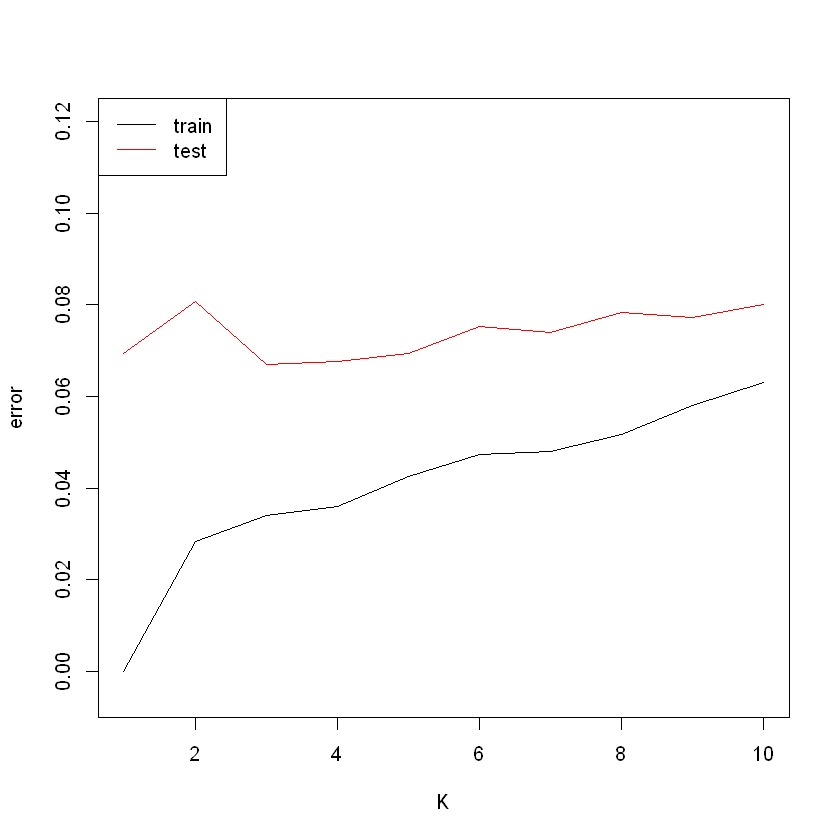

In [37]:
plot((1:10),train_error,type="l",ylim=c(-0.005,0.12),xlab="K",ylab="error")
lines((1:10),test_error,col="red")
legend("topleft",c("train","test"),col=c("black","red"),lty=c(1,1))

### (e). 
Fit multiple logistic regression 

In [38]:
library(doParallel)
cl <- makePSOCKcluster(4) # number of cores to use
registerDoParallel(cl)
cm3=cv.glmnet(new_train_X,(train_Y),family="multinomial",parallel=TRUE);
stopCluster(cl)

Warning message:
"package 'doParallel' was built under R version 3.4.3"Loading required package: iterators
Loading required package: parallel


The training classification error will be   

In [39]:
mul_log_pred=predict(cm3,newx=new_train_X,s="lambda.min",type="class")
table9=table(mul_log_pred,train_Y);
table9
1-sum(diag(table9))/sum(table9)

            train_Y
mul_log_pred   0   1   2   3   4   5   6   7   8   9
           0 297   0   4   0   0   2   0   0   0   3
           1   0 346   2   1   2   2   0   2   3   2
           2   1   1 266   2   0   3   1   4   4   0
           3   0   0   3 291   0   7   0   0   6   4
           4   0   1   3   0 278   1   3   1   0  10
           5   1   0   0  10   0 237   5   1   7   1
           6   4   1   4   2   4   5 286   0   2   0
           7   0   1   4   2   0   1   0 283   1   8
           8   2   1   1   7   2   4   1   1 266   2
           9   1   0   4   4   9   2   0   8   4 255

[1] 0.065

The test classification error will be   

In [40]:
mul_log_pred_test=predict(cm3,newx=new_test_X,s="lambda.min",type="class")
table10=table(mul_log_pred_test,test_Y);
table10
1-sum(diag(table10))/sum(table10)

                 test_Y
mul_log_pred_test   0   1   2   3   4   5   6   7   8   9
                0 281   0   3   2   0   5   1   0   3   5
                1   0 302   2   2   1   2   1   5   7   2
                2   3   0 231  13   0   0   1   6   7   2
                3   2   2   3 267   1  16   0   4  13   6
                4   1   0   5   0 245   8   0   4   0  15
                5   6   4   4  22   0 232   0   1   7   2
                6   2   0  12   0   6   3 298   0   2   0
                7   1   1  13   4   1   1   1 277   1  11
                8   1   5   6   5   2   7   2   2 268   0
                9   0   0   2   2  11   2   0  14   5 275

[1] 0.108

### (f). 
knn with $k=3$ has the lowest test error.

## 3.

### (a). 
The figure of accuracy will be 

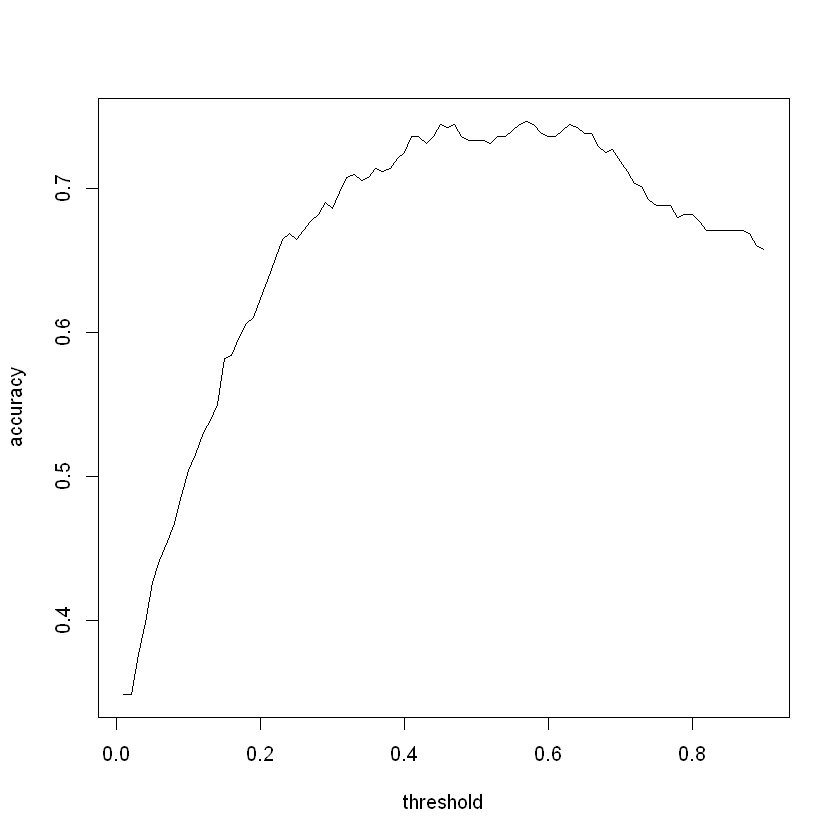

In [41]:
heart=read.csv("./Data/heart/heart.csv",header = T)
heart=na.omit(heart)
mt1=glm(chd~.,data=heart,family = "binomial")
pmt1=predict(mt1,type="response",newdata = heart)

accu_re<-function(thes)
{
  table_tmp=table(pmt1>thes,heart$chd)
  return(sum(diag(table_tmp))/sum(table_tmp))
}
acc_set=sapply(0.01*(1:90),accu_re)
plot(0.01*(1:90),acc_set,type="l",xlab="threshold",ylab="accuracy")

The threhold chosen by maximize accuracy will be 

In [42]:
bestthe1=0.01*(1:90)[which.max(acc_set)]
bestthe1

[1] 0.57

The  correponding confusion matrix will be 

In [43]:
table(pmt1>bestthe1,heart$chd)

       
          0   1
  FALSE 274  89
  TRUE   28  71

### (b) 
The ROC curve will be 

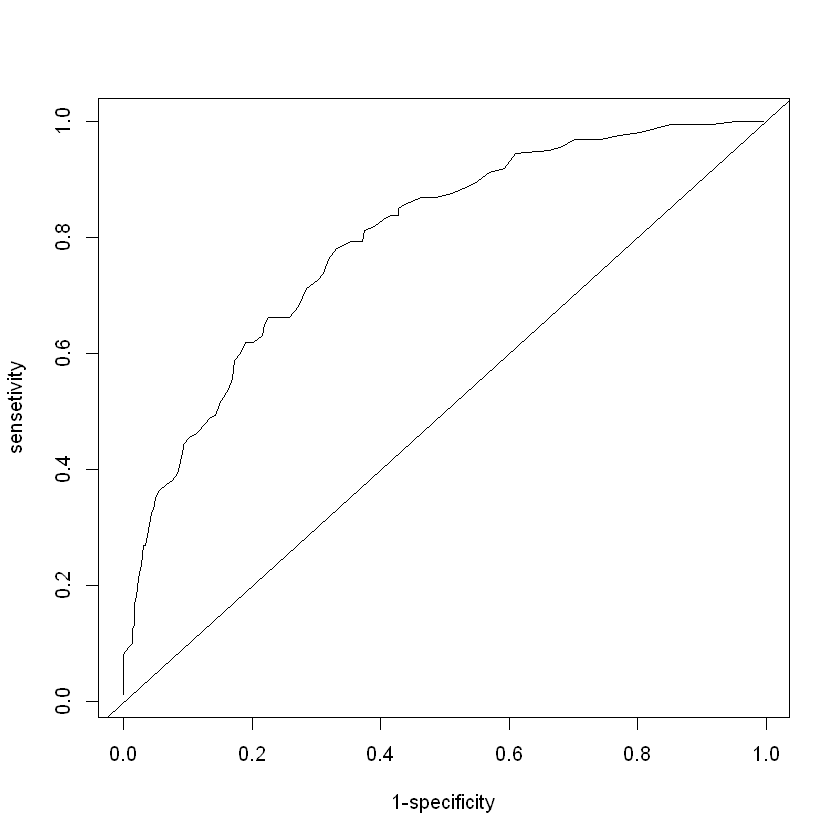

In [44]:
sen_spec_re<-function(thes)
{
  table_tmp=table(pmt1>thes,heart$chd)
  return(diag(table_tmp)/colSums(table_tmp))
}
sen_spec_set=sapply(0.01*(1:90),sen_spec_re)
row.names(sen_spec_set)=c("specificity","sensetivity")
colnames(sen_spec_set)=0.01*(1:90)
plot(1-sen_spec_set[1,],sen_spec_set[2,],type="l",xlab="1-specificity",ylab="sensetivity")
abline(0,1)

The threhold chosen by maximize accuracy will be 

In [45]:
bestthe2=0.01*(1:90)[which.max(colSums(sen_spec_set))];
bestthe2

[1] 0.32

The  correponding confusion matrix will be 

### (c). 
(b) is a better approach, because it has consider the proportion of the label.